## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.848362  0.967033 -0.296537  0.346256  1.668373  1.124898
1  1.219974 -0.613380  1.114359  0.295486  1.212467  0.992138
2  0.424762  1.544511  1.362743 -1.086241 -1.123252  0.173782
3 -0.408384 -0.938191 -0.350354  0.803302 -1.279781 -0.612899
4 -0.754544  0.846369 -0.855571 -1.529046 -1.449032 -1.217080


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0037580	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9921558	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9807291	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9696522	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9603802	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9483063	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9360461	total: 60ms	remaining: 8.51s
7:	learn: 0.9258057	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9162461	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9057409	total: 61.6ms	remaining: 6.1s
10:	learn: 0.8949045	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8832844	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8722266	total: 63.1ms	remaining: 4.79s
13:	learn: 0.8632715	total: 63.6ms	remaining: 4.48s
14:	learn: 0.8542023	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8434803	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8344564	total: 65ms	remaining: 3.76s
17:	learn: 0.8254598	total: 65.5ms	remaining: 3.57s
18:	learn: 0.8172348	total: 66.1ms	remaining: 3.4

64:	learn: 0.5043490	total: 89.1ms	remaining: 1.28s
65:	learn: 0.4994355	total: 89.7ms	remaining: 1.27s
66:	learn: 0.4949323	total: 90.1ms	remaining: 1.25s
67:	learn: 0.4904540	total: 90.6ms	remaining: 1.24s
68:	learn: 0.4856066	total: 90.9ms	remaining: 1.23s
69:	learn: 0.4808003	total: 91.3ms	remaining: 1.21s
70:	learn: 0.4766422	total: 91.9ms	remaining: 1.2s
71:	learn: 0.4716331	total: 92.4ms	remaining: 1.19s
72:	learn: 0.4668428	total: 92.9ms	remaining: 1.18s
73:	learn: 0.4620096	total: 93.5ms	remaining: 1.17s
74:	learn: 0.4573314	total: 94ms	remaining: 1.16s
75:	learn: 0.4532258	total: 94.6ms	remaining: 1.15s
76:	learn: 0.4485563	total: 95ms	remaining: 1.14s
77:	learn: 0.4446792	total: 95.5ms	remaining: 1.13s
78:	learn: 0.4416348	total: 95.9ms	remaining: 1.12s
79:	learn: 0.4380123	total: 96.4ms	remaining: 1.11s
80:	learn: 0.4342314	total: 96.8ms	remaining: 1.1s
81:	learn: 0.4305529	total: 97.1ms	remaining: 1.09s
82:	learn: 0.4261969	total: 97.6ms	remaining: 1.08s
83:	learn: 0.42270

268:	learn: 0.0922099	total: 187ms	remaining: 509ms
269:	learn: 0.0914939	total: 188ms	remaining: 508ms
270:	learn: 0.0908471	total: 189ms	remaining: 507ms
271:	learn: 0.0901676	total: 189ms	remaining: 506ms
272:	learn: 0.0894773	total: 189ms	remaining: 504ms
273:	learn: 0.0888595	total: 190ms	remaining: 503ms
274:	learn: 0.0881701	total: 190ms	remaining: 501ms
275:	learn: 0.0875873	total: 191ms	remaining: 500ms
276:	learn: 0.0870524	total: 191ms	remaining: 498ms
277:	learn: 0.0864386	total: 191ms	remaining: 497ms
278:	learn: 0.0857860	total: 192ms	remaining: 495ms
279:	learn: 0.0851175	total: 192ms	remaining: 494ms
280:	learn: 0.0844852	total: 193ms	remaining: 493ms
281:	learn: 0.0838720	total: 193ms	remaining: 491ms
282:	learn: 0.0833476	total: 193ms	remaining: 490ms
283:	learn: 0.0829437	total: 194ms	remaining: 488ms
284:	learn: 0.0823484	total: 194ms	remaining: 487ms
285:	learn: 0.0817976	total: 195ms	remaining: 486ms
286:	learn: 0.0812794	total: 195ms	remaining: 484ms
287:	learn: 

450:	learn: 0.0384925	total: 272ms	remaining: 331ms
451:	learn: 0.0384470	total: 273ms	remaining: 331ms
452:	learn: 0.0382622	total: 274ms	remaining: 331ms
453:	learn: 0.0380456	total: 274ms	remaining: 330ms
454:	learn: 0.0379155	total: 275ms	remaining: 329ms
455:	learn: 0.0376902	total: 275ms	remaining: 328ms
456:	learn: 0.0376150	total: 276ms	remaining: 327ms
457:	learn: 0.0374864	total: 276ms	remaining: 327ms
458:	learn: 0.0374430	total: 276ms	remaining: 326ms
459:	learn: 0.0372184	total: 277ms	remaining: 325ms
460:	learn: 0.0369991	total: 277ms	remaining: 324ms
461:	learn: 0.0367849	total: 278ms	remaining: 323ms
462:	learn: 0.0365758	total: 278ms	remaining: 323ms
463:	learn: 0.0363803	total: 279ms	remaining: 322ms
464:	learn: 0.0361972	total: 279ms	remaining: 321ms
465:	learn: 0.0360713	total: 280ms	remaining: 320ms
466:	learn: 0.0358888	total: 281ms	remaining: 320ms
467:	learn: 0.0358181	total: 281ms	remaining: 320ms
468:	learn: 0.0357482	total: 282ms	remaining: 319ms
469:	learn: 

649:	learn: 0.0185752	total: 371ms	remaining: 200ms
650:	learn: 0.0184844	total: 371ms	remaining: 199ms
651:	learn: 0.0183649	total: 372ms	remaining: 198ms
652:	learn: 0.0182473	total: 372ms	remaining: 198ms
653:	learn: 0.0181751	total: 373ms	remaining: 197ms
654:	learn: 0.0181412	total: 373ms	remaining: 197ms
655:	learn: 0.0181077	total: 374ms	remaining: 196ms
656:	learn: 0.0180485	total: 374ms	remaining: 195ms
657:	learn: 0.0179338	total: 375ms	remaining: 195ms
658:	learn: 0.0179009	total: 375ms	remaining: 194ms
659:	learn: 0.0178314	total: 376ms	remaining: 194ms
660:	learn: 0.0177351	total: 376ms	remaining: 193ms
661:	learn: 0.0177030	total: 377ms	remaining: 192ms
662:	learn: 0.0176380	total: 377ms	remaining: 192ms
663:	learn: 0.0175442	total: 378ms	remaining: 191ms
664:	learn: 0.0174908	total: 378ms	remaining: 191ms
665:	learn: 0.0173989	total: 379ms	remaining: 190ms
666:	learn: 0.0173465	total: 380ms	remaining: 190ms
667:	learn: 0.0172771	total: 380ms	remaining: 189ms
668:	learn: 

819:	learn: 0.0098502	total: 455ms	remaining: 99.8ms
820:	learn: 0.0098255	total: 455ms	remaining: 99.3ms
821:	learn: 0.0097988	total: 456ms	remaining: 98.7ms
822:	learn: 0.0097410	total: 457ms	remaining: 98.2ms
823:	learn: 0.0097005	total: 457ms	remaining: 97.7ms
824:	learn: 0.0096637	total: 458ms	remaining: 97.1ms
825:	learn: 0.0096098	total: 458ms	remaining: 96.5ms
826:	learn: 0.0095858	total: 459ms	remaining: 95.9ms
827:	learn: 0.0095333	total: 459ms	remaining: 95.4ms
828:	learn: 0.0094949	total: 459ms	remaining: 94.8ms
829:	learn: 0.0094601	total: 460ms	remaining: 94.2ms
830:	learn: 0.0094093	total: 461ms	remaining: 93.7ms
831:	learn: 0.0093875	total: 461ms	remaining: 93.1ms
832:	learn: 0.0093479	total: 462ms	remaining: 92.5ms
833:	learn: 0.0092985	total: 462ms	remaining: 92ms
834:	learn: 0.0092771	total: 463ms	remaining: 91.4ms
835:	learn: 0.0092417	total: 463ms	remaining: 90.8ms
836:	learn: 0.0091997	total: 464ms	remaining: 90.3ms
837:	learn: 0.0091808	total: 464ms	remaining: 89

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

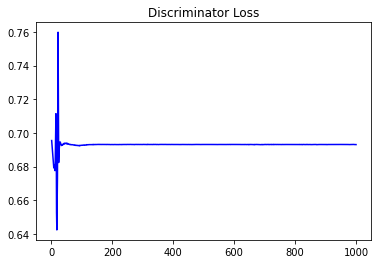

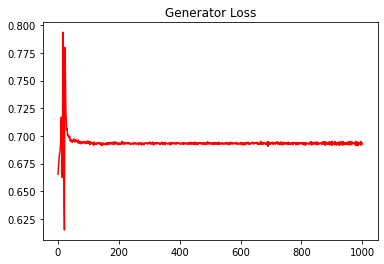

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.128912321542244


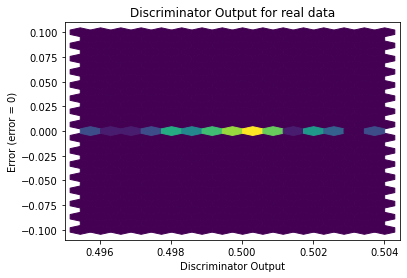

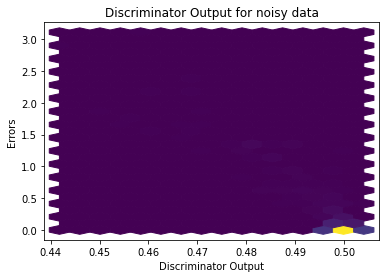

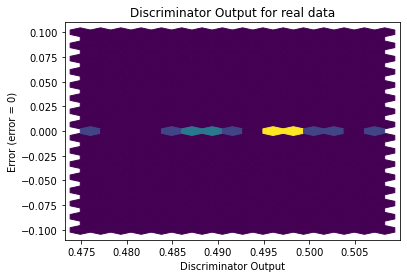

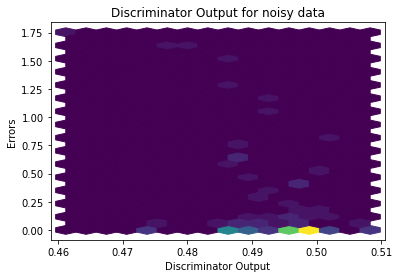

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


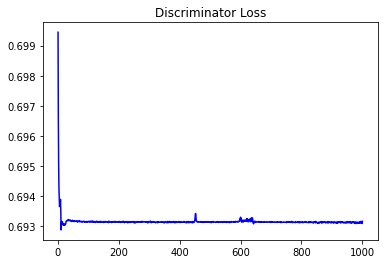

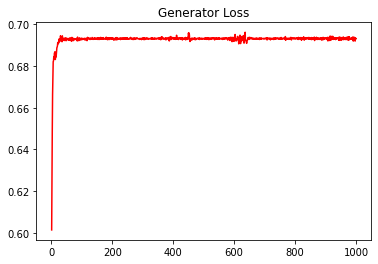

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13654696062640645


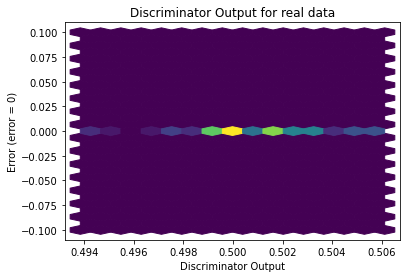

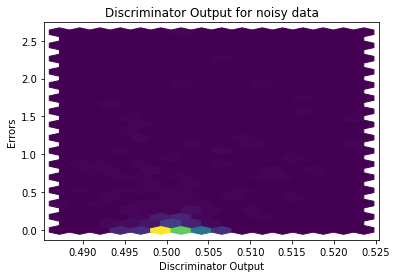

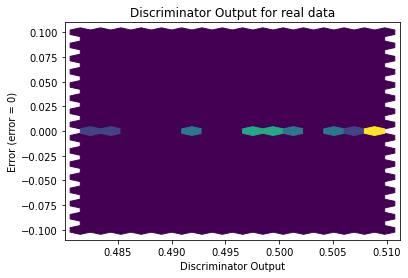

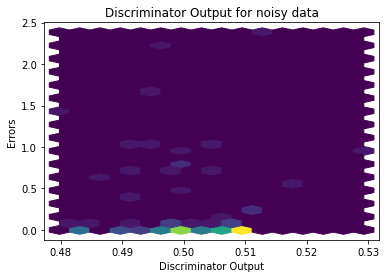

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
